# Figure 11: The expected time until extinction of a Wolbachia-only household for a range of household sizes under the $30$ mosquito no reversion model

Import required libraries

In [1]:
import numpy as np
import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle

Import required scripts

In [2]:
import importlib
import Rate_transitions
import Finding_dictionary_keys
import Prob_absorb_to_each
import Time_absorb_wild_states
import Hughes_model

get_transition = Rate_transitions.get_transition_Hughes
find_keys = Finding_dictionary_keys.find_keys
prob_reach_absorb = Prob_absorb_to_each.prob_reach_absorb_Hughes
F = Hughes_model.F_hughes
absorb_time_wolb = Time_absorb_wild_states.absorb_time_wolb_Hughes
absorb_time_ext = Time_absorb_wild_states.absorb_time_ext

# scripts autosave, so no need to re-run code chunk after making changes
%load_ext autoreload
%autoreload 2

Parameter values

In [3]:
K = 30        # reproductive carrying capacity
d1 = 12/100   # wild-type death rate
d2 = 12/100   # Wolbachia death rate
phi = 85/100    # Wolbachia fitness

v = 10/10     # probability of vertical transmission
u = 10/10     # ratio of unviable offspring produced by an infected male and uninfected female

k = 0.3           # Mosquito competition parameter
h = 0.19*100**k   # Mosquito competition parameter

b1 = round(d1/F(10,h,k,K),2) # wild-type per capita birth rate
b2 = b1*phi                # Wolbachia per capita birth rate
max_pop = K

# create a dictionary to store all parameter values
params_dict = {'b1': b1,
              'b2': b2,
              'K': K,
              'd1': d1,
              'd2': d2,
              'v': v,
              'phi': phi,
              'u': u,
              'h': h,
              'k': k
              }

Finding the expected time until extinction of the Wolbachia only household

In [4]:
# the state space
state_dict = {index: np.array((i, j)) for index, (i, j) in enumerate([(i, j) for i in range(max_pop + 1) for j in   range(max_pop + 1) if i + j <= max_pop])}
# the Wolbachia-only states
trans_dict = {index: np.array((0, j)) for index, j in enumerate([j for j in range(1, max_pop + 1) if j <= max_pop])}
n_transient = len(trans_dict) # number of transient states i.e. Wolbachia only (not extinct)
ac, Qcc = prob_reach_absorb(state_dict,trans_dict,[0,0],params_dict) # finding the probabilities of reaching extinction
ext_time = absorb_time_ext(max_pop,np.ones(n_transient),params_dict)  # finding the expected extinction times
ext_time = np.insert(ext_time, 0, 0)  # if already in absorbing state, time is 0
print('extinction times are', ext_time)

extinction times are [  0.          73.32976059 109.53404479 130.78909213 144.61685321
 154.27994763 161.40279081 166.87474524 171.21881955 174.76046841
 177.71177491 180.21636418 182.37472515 184.2591621  185.92297814
 187.4063114  188.73995602 189.94792983 191.04923927 192.05911566
 192.98989287 193.85163159 194.65255191 195.39929986 196.0970324
 196.74924117 197.35710884 197.91792251 198.42146617 198.84193641
 199.11971419]


Plotting the extinction times of the Wolbachia only households over the state space range

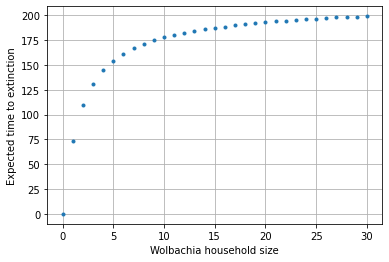

In [5]:
matplotlib.rcParams.update({'font.size': 15})  # font size
x=np.arange(0, 31, 1)
plt.plot(x,ext_time,'.')
plt.xlabel('Wolbachia household size')
plt.ylabel('Expected time to extinction')
plt.grid()
plt.savefig('ext_time_qu_phi085.pdf', bbox_inches='tight')  # saves figure

For Figure B9 in the Appendix, change the larval density function and rerun the results.